In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.drop(['CustomerID'], inplace=True, axis=1)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

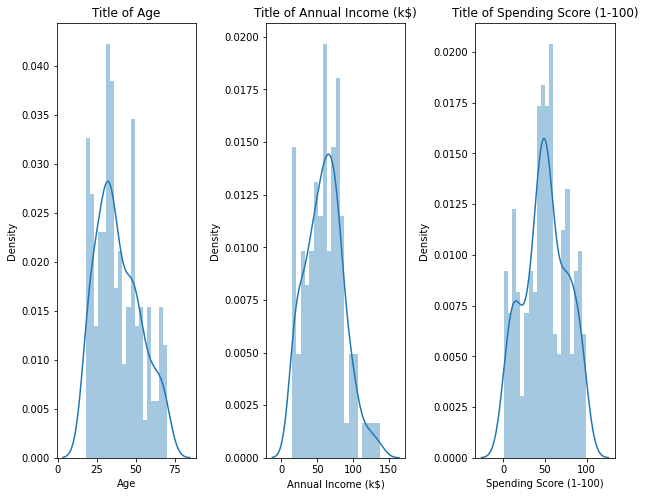

In [11]:
plt.figure(1, figsize=(10,8))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title("Title of {}".format(x))
plt.show()

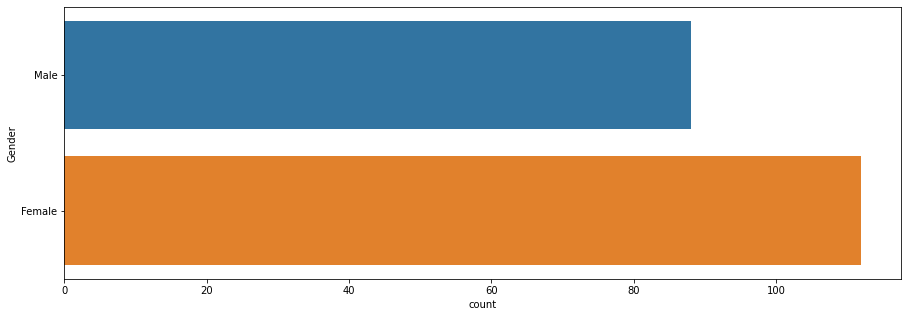

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)

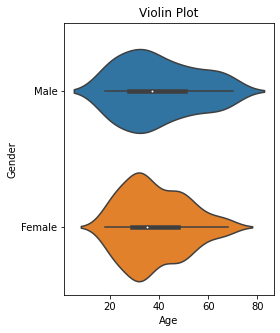

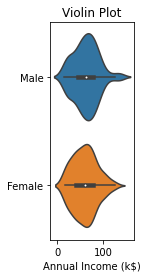

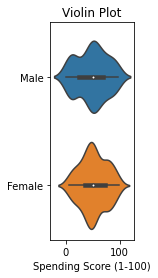

In [13]:
plt.figure(1, figsize=(15,5))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin Plot")
    plt.show()

Text(0.5, 1.0, 'Number of Customers and Ages')

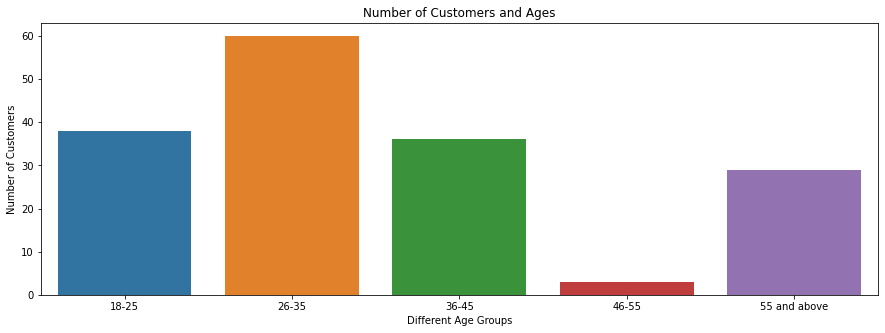

In [14]:
#grouping the ages into different age categories 
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 46)]
age_55 = df.Age[(df.Age > 55)]

agex = ['18-25', '26-35', '36-45', '46-55', '55 and above']
agey = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55)]

plt.figure(figsize=(15,5))
sns.barplot(x=agex, y=agey)
plt.xlabel("Different Age Groups")
plt.ylabel("Number of Customers")
plt.title("Number of Customers and Ages")

# Relationship between Annual Income and Spending Score

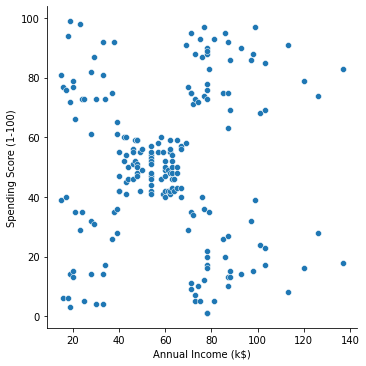

In [15]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

Text(0, 0.5, 'Number of Customers')

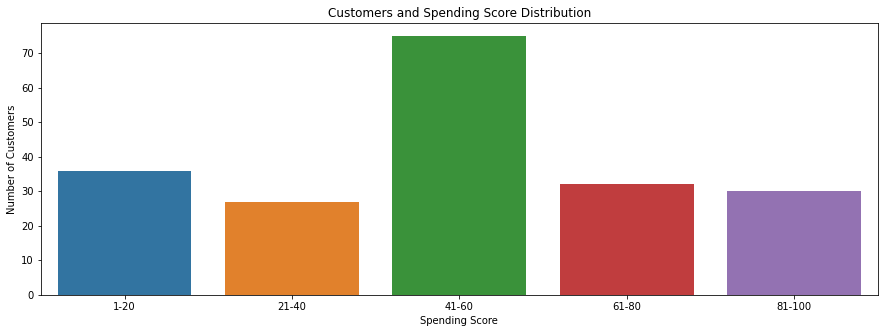

In [16]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1_20), len(ss_21_40), len(ss_41_60), len(ss_61_80), len(ss_81_100)]

plt.figure(figsize=(15,5))
sns.barplot(x=ssx, y=ssy, data=df)
plt.title("Customers and Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")

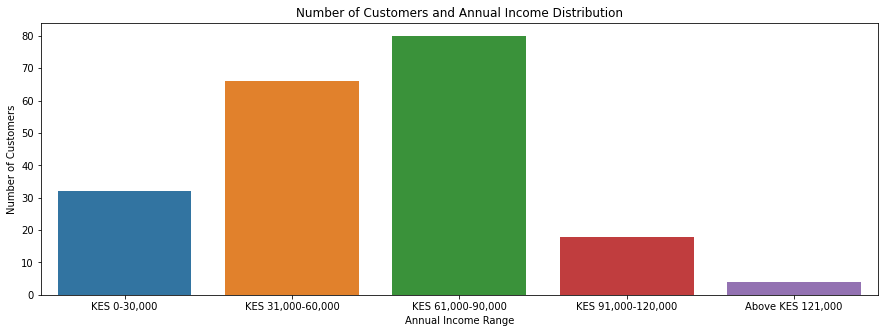

In [17]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai_121_ = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121)]


aix = ['KES 0-30,000', 'KES 31,000-60,000', 'KES 61,000-90,000', 'KES 91,000-120,000', 'Above KES 121,000']
aiy = [len(ai_0_30), len(ai_31_60), len(ai_61_90), len(ai_91_120), len(ai_121_)]

plt.figure(figsize=(15,5))
sns.barplot(x=aix, y=aiy, data=df)
plt.title("Number of Customers and Annual Income Distribution")
plt.xlabel("Annual Income Range")
plt.ylabel("Number of Customers")
plt.show()

# Relationship between Age and Spending Score Clustering

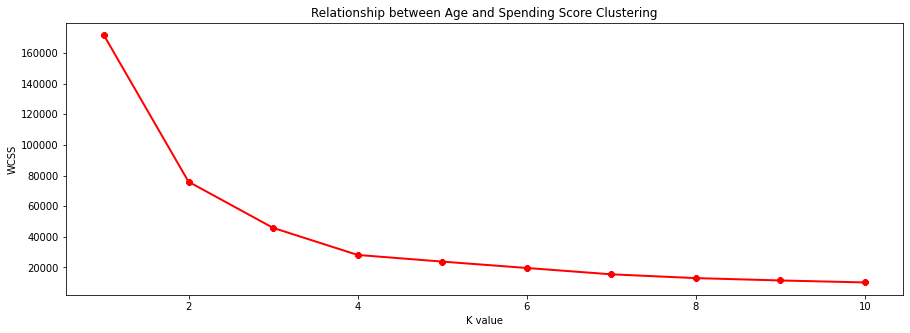

In [21]:
X1=df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans 
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.title("Relationship between Age and Spending Score Clustering")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4)

#predict the label of the structures 
label = kmeans.fit_predict(X1)

print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


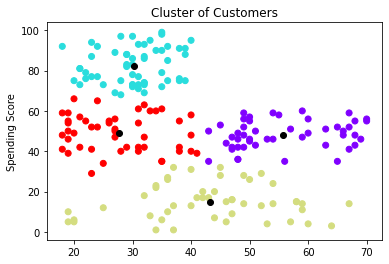

In [25]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Cluster of Customers")
plt.ylabel("Spending Score")
plt.show()

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
df['Cluster'] = label
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3
